In [3]:
import sys
import os

# Define o caminho raiz do projeto
# Garante que o diretório atual (onde o notebook está) seja a raiz do projeto,
# permitindo a importação direta de 'src'.
project_root = os.getcwd() # Pega o diretório atual (S.I-1-Projeto-Final)

# Adiciona o diretório raiz do projeto ao PATH se ainda não estiver lá
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"Raiz do Projeto: {project_root}")
# print(sys.path) # Opcional: verifique o path

# --- Imports da aplicação ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se a correção em 'src/utils.py' foi feita, estes imports funcionarão:
from src.etl import load_and_preprocess_data
from src.feature_engineering import create_features

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("\n✓ Bibliotecas e Módulos importados com sucesso!")

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✓ Bibliotecas importadas com sucesso!")


Raiz do Projeto: c:\Users\vinis\OneDrive\Área de Trabalho\UTFPR\7° semestre\Sistemas Inteligentes\Projeto-Final\notebooks


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'model_xgboost'

In [ ]:
print("Carregando dados...")
data = load_and_preprocess_data()
print(f"\n✓ Dados carregados!")
print(f"Partidas: {len(data['fixtures']):,}")
print(f"Times: {len(data['teams']):,}")
print(f"Jogadores: {len(data['players']):,}")

2025-12-03 20:04:31,774 - INFO - ============================================================
2025-12-03 20:04:31,775 - INFO - INICIANDO CARREGAMENTO DE DADOS
2025-12-03 20:04:31,775 - INFO - ============================================================
2025-12-03 20:04:31,776 - INFO - 
--- Carregando dados base ---
2025-12-03 20:04:31,897 - INFO - ✓ Fixtures carregado: 67,065 partidas
2025-12-03 20:04:31,919 - INFO - ✓ Teams carregado: 4,138 times


Carregando dados...


2025-12-03 20:04:32,163 - INFO - ✓ Players carregado: 64,668 jogadores
2025-12-03 20:04:32,192 - INFO - ✓ Standings carregado: 6,069 registros
2025-12-03 20:04:32,321 - INFO - ✓ Team Stats carregado: 101,978 registros
2025-12-03 20:04:32,334 - INFO - ✓ Leagues carregado: 1,084 ligas
2025-12-03 20:04:32,336 - INFO - ✓ Status carregado: 19 status
2025-12-03 20:04:32,352 - INFO - ✓ Venues carregado: 3,232 estádios
2025-12-03 20:04:32,353 - INFO - 
--- Carregando dados de lineup ---
2025-12-03 20:04:41,540 - INFO - ✓ 309 arquivos de lineup carregados (1,585,983 registros)
2025-12-03 20:04:41,541 - INFO - 
--- Carregando dados de player stats ---
2025-12-03 20:04:46,116 - INFO - ✓ 224 arquivos de player stats carregados (250,669 registros)
2025-12-03 20:04:46,117 - INFO - 
✓ Todos os dados carregados com sucesso!
2025-12-03 20:04:46,117 - INFO - 
2025-12-03 20:04:46,117 - INFO - INICIANDO PRÉ-PROCESSAMENTO
2025-12-03 20:04:46,118 - INFO - ====================================================


✓ Dados carregados!
Partidas: 55,838
Times: 4,138
Jogadores: 64,668


ANÁLISE DAS PARTIDAS

Distribuição de Resultados:
result
1    25497
2    16800
0    13541
Name: count, dtype: int64

Percentuais:
result
1    45.662452
2    30.087038
0    24.250510
Name: proportion, dtype: float64


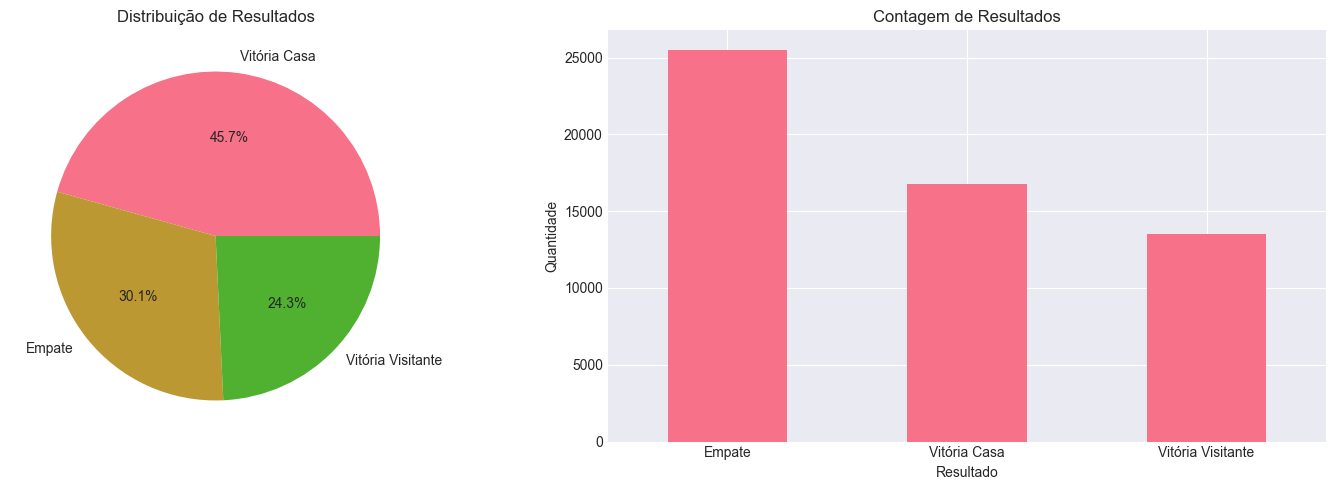

In [ ]:
fixtures = data['fixtures']

print("="*60)
print("ANÁLISE DAS PARTIDAS")
print("="*60)

# Distribuição de resultados
print("\nDistribuição de Resultados:")
print(fixtures['result'].value_counts())
print(f"\nPercentuais:")
print(fixtures['result'].value_counts(normalize=True) * 100)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de pizza
fixtures['result'].value_counts().plot(
    kind='pie',
    labels=['Vitória Casa', 'Empate', 'Vitória Visitante'],
    autopct='%1.1f%%',
    ax=axes[0]
)
axes[0].set_title('Distribuição de Resultados')
axes[0].set_ylabel('')

# Gráfico de barras
fixtures['result'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Contagem de Resultados')
axes[1].set_xlabel('Resultado')
axes[1].set_ylabel('Quantidade')
axes[1].set_xticklabels(['Empate', 'Vitória Casa', 'Vitória Visitante'], rotation=0)

plt.tight_layout()
plt.show()



ANÁLISE TEMPORAL


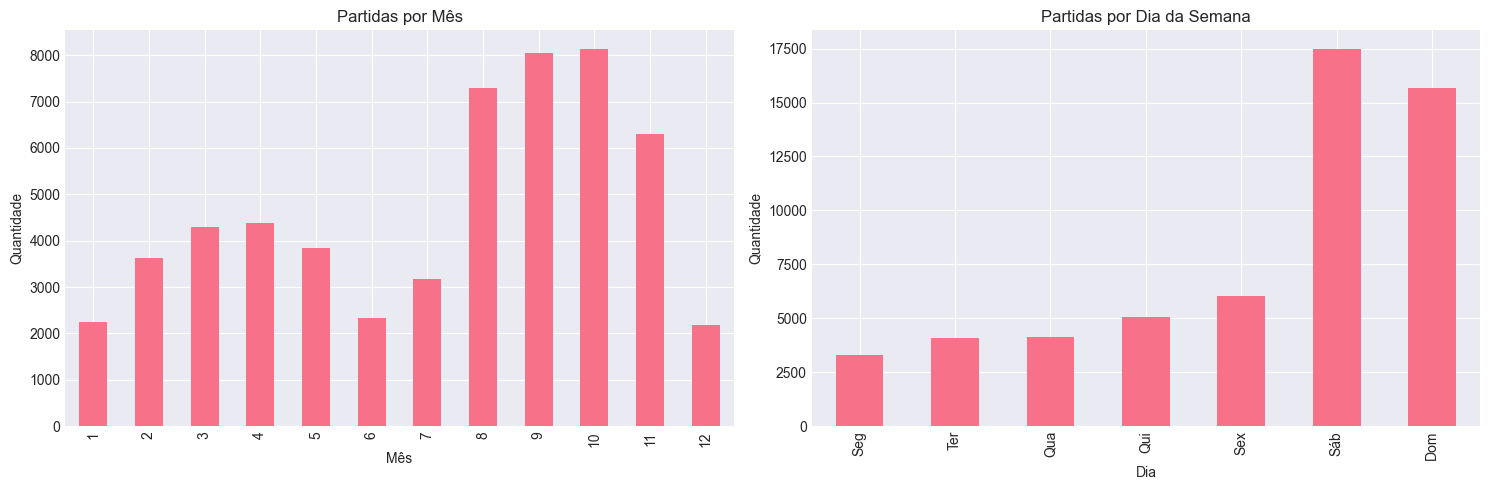

In [ ]:

print("\n" + "="*60)
print("ANÁLISE TEMPORAL")
print("="*60)

fixtures['month'] = fixtures['date'].dt.month
fixtures['weekday'] = fixtures['date'].dt.dayofweek

# Partidas por mês
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fixtures['month'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Partidas por Mês')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Quantidade')

# Partidas por dia da semana
day_names = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
weekday_counts = fixtures['weekday'].value_counts().sort_index()
weekday_counts.index = [day_names[i] for i in weekday_counts.index]
weekday_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Partidas por Dia da Semana')
axes[1].set_xlabel('Dia')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()



ANÁLISE DE GOLS
Média de gols por partida: 2.67
Mediana de gols: 2.00
Gols máximos em uma partida: 19


C:\Users\Rafaribas\AppData\Local\Temp\ipykernel_86688\2933572357.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(result_goals, labels=['Empate', 'Vitória Casa', 'Vitória Visitante'])


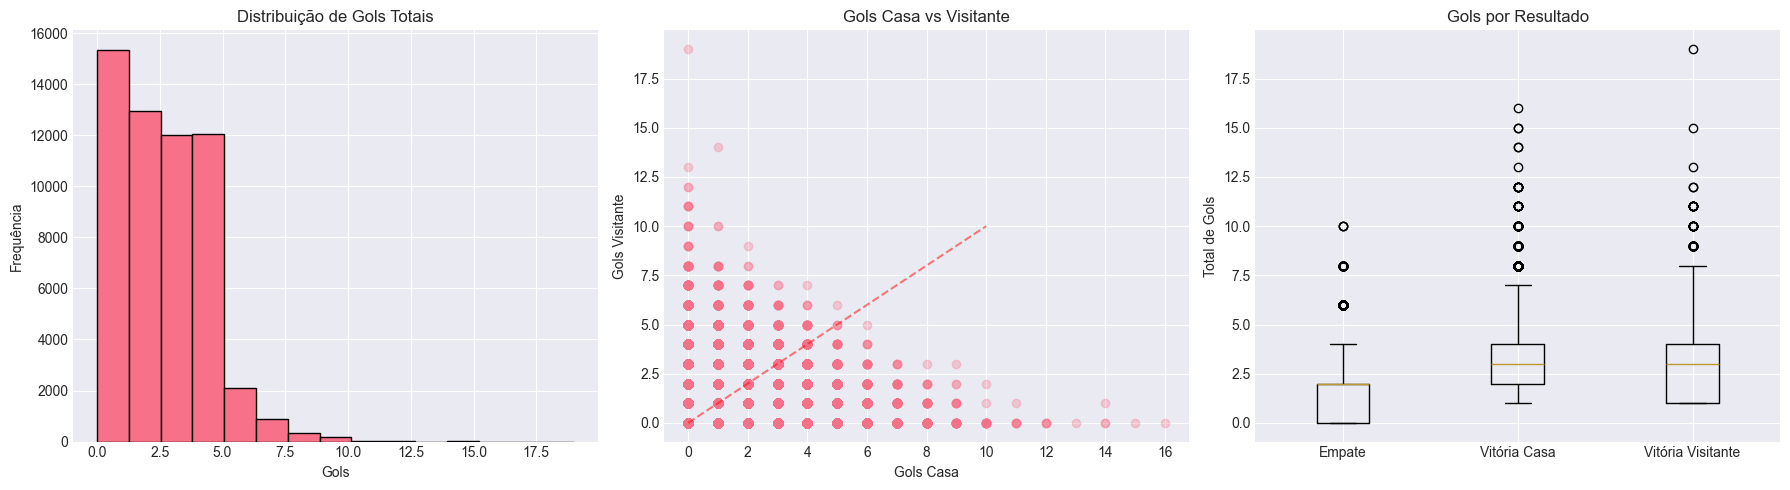

In [ ]:
print("\n" + "="*60)
print("ANÁLISE DE GOLS")
print("="*60)

if 'homeScore' in fixtures.columns and 'awayScore' in fixtures.columns:
    fixtures['total_goals'] = fixtures['homeScore'] + fixtures['awayScore']
    
    print(f"Média de gols por partida: {fixtures['total_goals'].mean():.2f}")
    print(f"Mediana de gols: {fixtures['total_goals'].median():.2f}")
    print(f"Gols máximos em uma partida: {fixtures['total_goals'].max()}")
    
    # Distribuição de gols
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Total de gols
    fixtures['total_goals'].hist(bins=15, ax=axes[0], edgecolor='black')
    axes[0].set_title('Distribuição de Gols Totais')
    axes[0].set_xlabel('Gols')
    axes[0].set_ylabel('Frequência')
    
    # Gols casa vs visitante
    axes[1].scatter(fixtures['homeScore'], fixtures['awayScore'], alpha=0.3)
    axes[1].set_title('Gols Casa vs Visitante')
    axes[1].set_xlabel('Gols Casa')
    axes[1].set_ylabel('Gols Visitante')
    axes[1].plot([0, 10], [0, 10], 'r--', alpha=0.5)
    
    # Boxplot por resultado
    result_goals = fixtures.groupby('result')['total_goals'].apply(list)
    axes[2].boxplot(result_goals, labels=['Empate', 'Vitória Casa', 'Vitória Visitante'])
    axes[2].set_title('Gols por Resultado')
    axes[2].set_ylabel('Total de Gols')
    
    plt.tight_layout()
    plt.show()


ANÁLISE DE CLASSIFICAÇÃO
Pontos - Média: 19.87
Pontos - Mediana: 14.00
Pontos - Máximo: 102


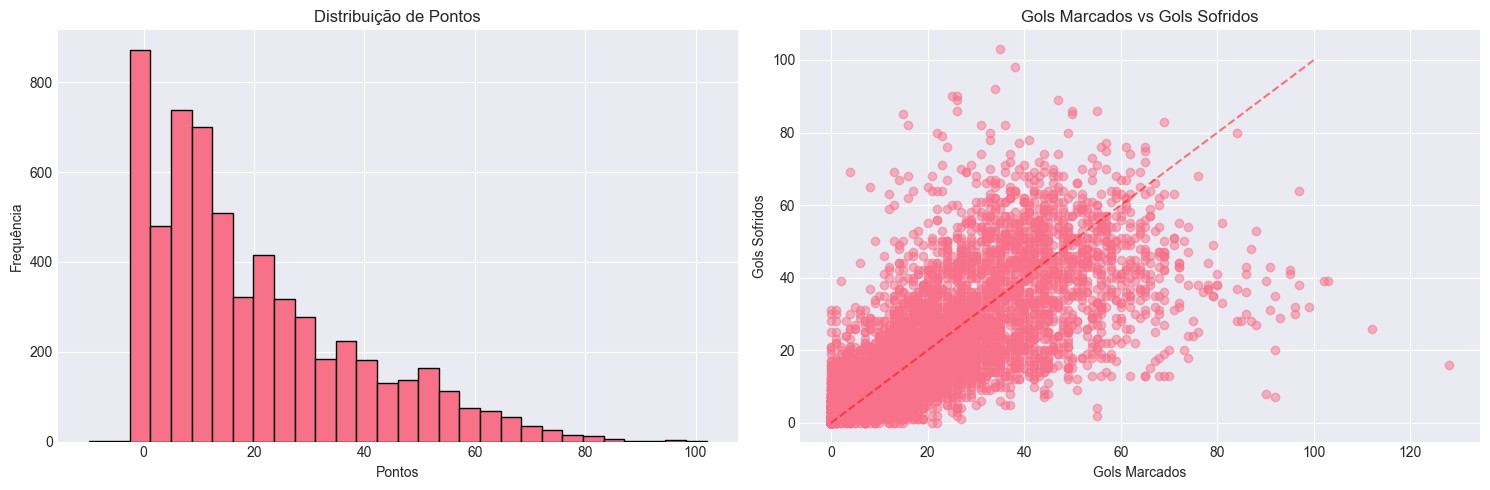

In [ ]:
print("\n" + "="*60)
print("ANÁLISE DE CLASSIFICAÇÃO")
print("="*60)

standings = data['standings']

if 'points' in standings.columns:
    print(f"Pontos - Média: {standings['points'].mean():.2f}")
    print(f"Pontos - Mediana: {standings['points'].median():.2f}")
    print(f"Pontos - Máximo: {standings['points'].max()}")
    
    # Distribuição de pontos
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    standings['points'].hist(bins=30, ax=axes[0], edgecolor='black')
    axes[0].set_title('Distribuição de Pontos')
    axes[0].set_xlabel('Pontos')
    axes[0].set_ylabel('Frequência')
    
    # Gols marcados vs sofridos
    if 'gf' in standings.columns and 'ga' in standings.columns:
        axes[1].scatter(standings['gf'], standings['ga'], alpha=0.5)
        axes[1].set_title('Gols Marcados vs Gols Sofridos')
        axes[1].set_xlabel('Gols Marcados')
        axes[1].set_ylabel('Gols Sofridos')
        axes[1].plot([0, 100], [0, 100], 'r--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


ANÁLISE DE JOGADORES
Idade - Média: 24.4 anos
Idade - Mediana: 24.0 anos
Altura - Média: 1.80 m
Peso - Média: 73.2 kg


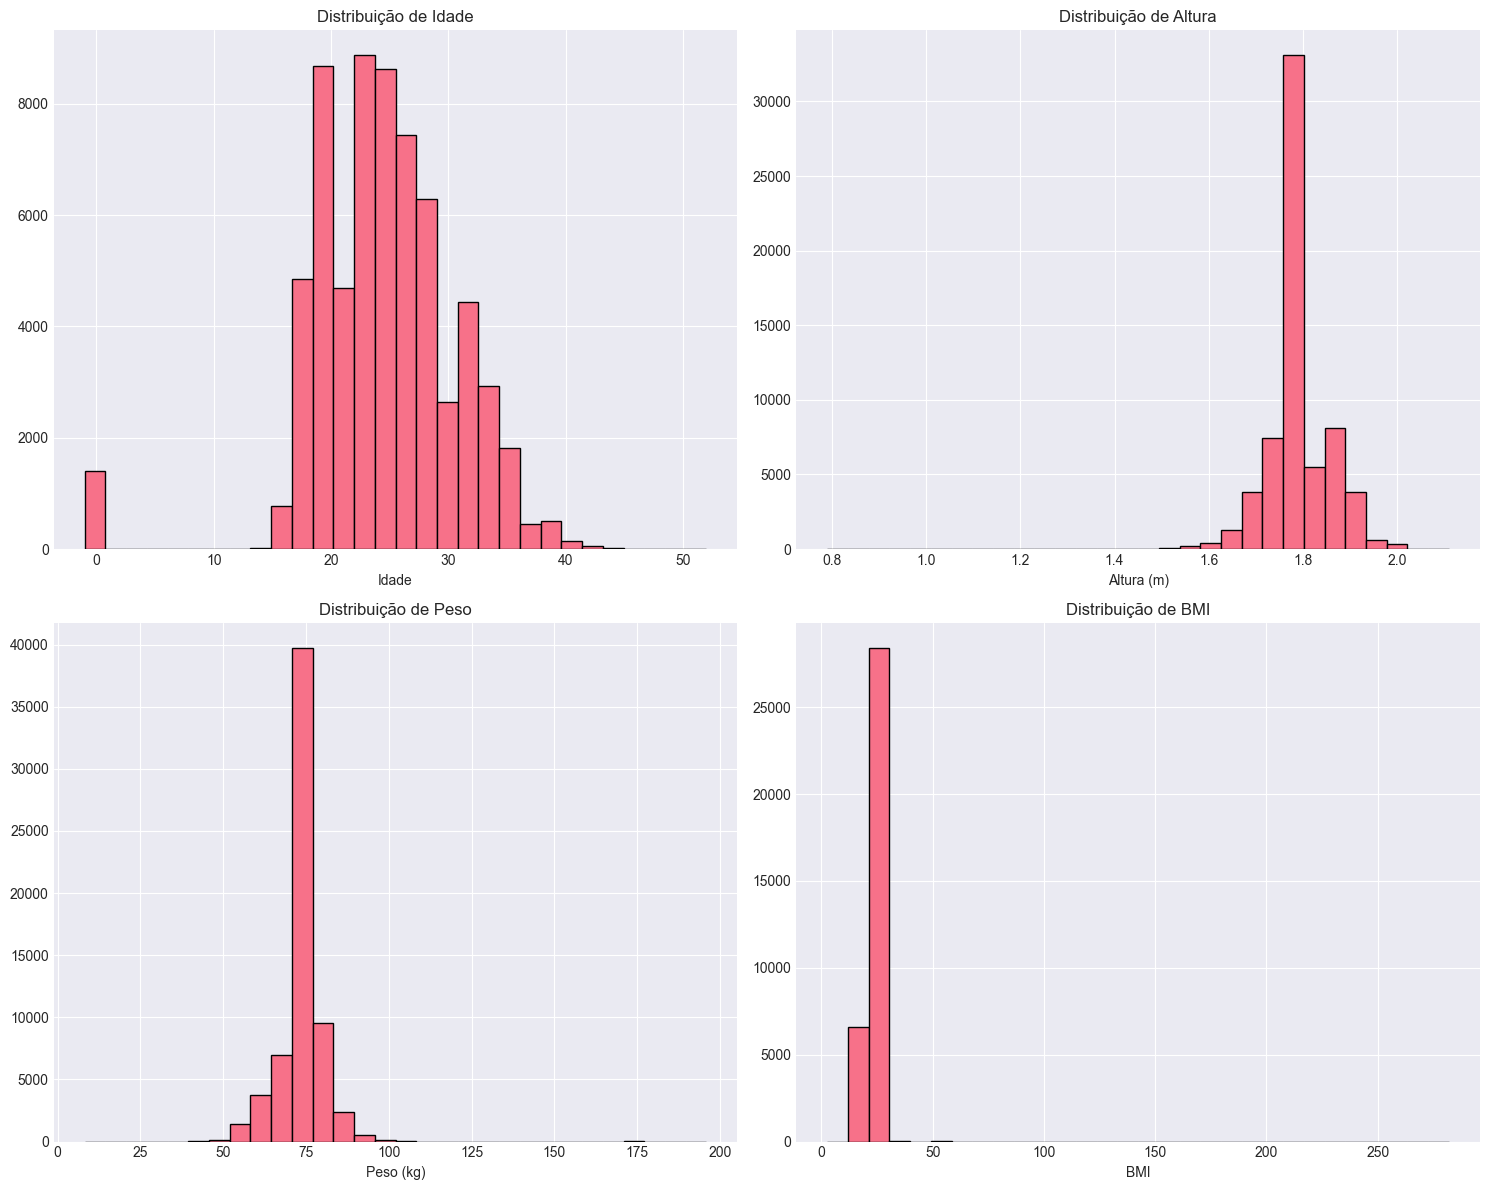

In [ ]:
print("\n" + "="*60)
print("ANÁLISE DE JOGADORES")
print("="*60)

players = data['players']

if 'age' in players.columns:
    print(f"Idade - Média: {players['age'].mean():.1f} anos")
    print(f"Idade - Mediana: {players['age'].median():.1f} anos")

if 'height_m' in players.columns:
    print(f"Altura - Média: {players['height_m'].mean():.2f} m")

if 'weight_kg' in players.columns:
    print(f"Peso - Média: {players['weight_kg'].mean():.1f} kg")

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if 'age' in players.columns:
    players['age'].hist(bins=30, ax=axes[0, 0], edgecolor='black')
    axes[0, 0].set_title('Distribuição de Idade')
    axes[0, 0].set_xlabel('Idade')

if 'height_m' in players.columns:
    players['height_m'].hist(bins=30, ax=axes[0, 1], edgecolor='black')
    axes[0, 1].set_title('Distribuição de Altura')
    axes[0, 1].set_xlabel('Altura (m)')

if 'weight_kg' in players.columns:
    players['weight_kg'].hist(bins=30, ax=axes[1, 0], edgecolor='black')
    axes[1, 0].set_title('Distribuição de Peso')
    axes[1, 0].set_xlabel('Peso (kg)')

if 'bmi' in players.columns:
    players['bmi'].hist(bins=30, ax=axes[1, 1], edgecolor='black')
    axes[1, 1].set_title('Distribuição de BMI')
    axes[1, 1].set_xlabel('BMI')

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*60)
print("CRIANDO FEATURES")
print("="*60)

master_df = create_features(data)
print(f"\n✓ Features criadas!")
print(f"Shape: {master_df.shape}")
print(f"\nPrimeiras linhas:")
display(master_df.head())

2025-12-03 20:05:12,590 - INFO - 
2025-12-03 20:05:12,591 - INFO - INICIANDO FEATURE ENGINEERING
2025-12-03 20:05:12,591 - INFO - ============================================================
2025-12-03 20:05:12,592 - INFO - 
--- Inicializando Master DataFrame ---
2025-12-03 20:05:12,597 - INFO - Colunas em leagues: ['seasonType', 'year', 'seasonName', 'seasonSlug', 'leagueId', 'midsizeName', 'leagueName', 'leagueShortName']
2025-12-03 20:05:12,672 - INFO - ✓ Informações da liga adicionadas usando coluna 'leagueName'
2025-12-03 20:05:12,673 - INFO - ✓ Master DF inicializado: 356,101 partidas
2025-12-03 20:05:12,673 - INFO -   Distribuição do target:
2025-12-03 20:05:12,674 - INFO -     Empate (0): 84,261
2025-12-03 20:05:12,676 - INFO -     Vitória Casa (1): 164,704
2025-12-03 20:05:12,677 - INFO -     Vitória Visitante (2): 107,136
2025-12-03 20:05:12,677 - INFO - 
--- Adicionando features de forma recente ---



CRIANDO FEATURES


c:\Users\Rafaribas\Desktop\Faculdade\Curso\6º período\SI\S.I-1-Projeto-Final\src\feature_engineering.py:172: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.master_df[col].fillna(0, inplace=True)
2025-12-03 20:05:13,696 - INFO - ✓ Features de forma recente adicionadas
2025-12-03 20:05:13,698 - INFO - 
--- Adicionando features de performance ---
c:\Users\Rafaribas\Desktop\Faculdade\Curso\6º período\SI\S.I-1-Projeto-Final\src\feature_engineering.py:218: FutureWarning: A value is trying to be set on a copy of a DataFrame or Se


✓ Features criadas!
Shape: (55838, 41)

Primeiras linhas:


,eventId,date,homeTeamId,awayTeamId,target,home_recent_wins,home_recent_draws,home_recent_losses,home_form_points,away_recent_wins,away_recent_draws,away_recent_losses,away_form_points,home_goals_per_game,home_goals_against_per_game,home_goal_difference,home_points,home_wins,home_losses,away_goals_per_game,away_goals_against_per_game,away_goal_difference,away_points,away_wins,away_losses,home_possession_avg,away_possession_avg,home_pass_accuracy,away_pass_accuracy,home_shot_accuracy,away_shot_accuracy,home_avg_age,away_avg_age,home_avg_height,away_avg_height,home_avg_weight,away_avg_weight,points_difference,form_difference,attack_difference,defense_difference
0,689519,2024-01-01 05:00:00,627,4396,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.437500,39.815000,31.596834,24.904948,18.005952,24.605728,26.454545,28.363636,1.789091,1.780000,71.502727,70.141818,0.0,0.0,0.0,0.0
2,694555,2024-01-01 13:30:00,658,1928,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.405950,24.405950,1.800202,1.800202,73.151933,73.151933,0.0,0.0,0.0,0.0
4,693431,2024-01-02 13:00:00,4895,2621,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.690000,12.116667,0.000000,0.000000,14.260836,9.166667,25.750000,26.545455,1.750833,1.831818,70.875000,73.854545,0.0,0.0,0.0,0.0
6,694586,2024-01-04 12:00:00,1928,6723,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.405950,24.405950,1.800202,1.800202,73.151933,73.151933,0.0,0.0,0.0,0.0
8,690701,2024-01-04 13:30:00,655,4388,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.694118,3.092857,22.931102,5.560440,8.963585,0.000000,24.405950,28.000000,1.800202,1.850000,73.151933,81.190000,0.0,0.0,0.0,0.0



ANÁLISE DE CORRELAÇÃO


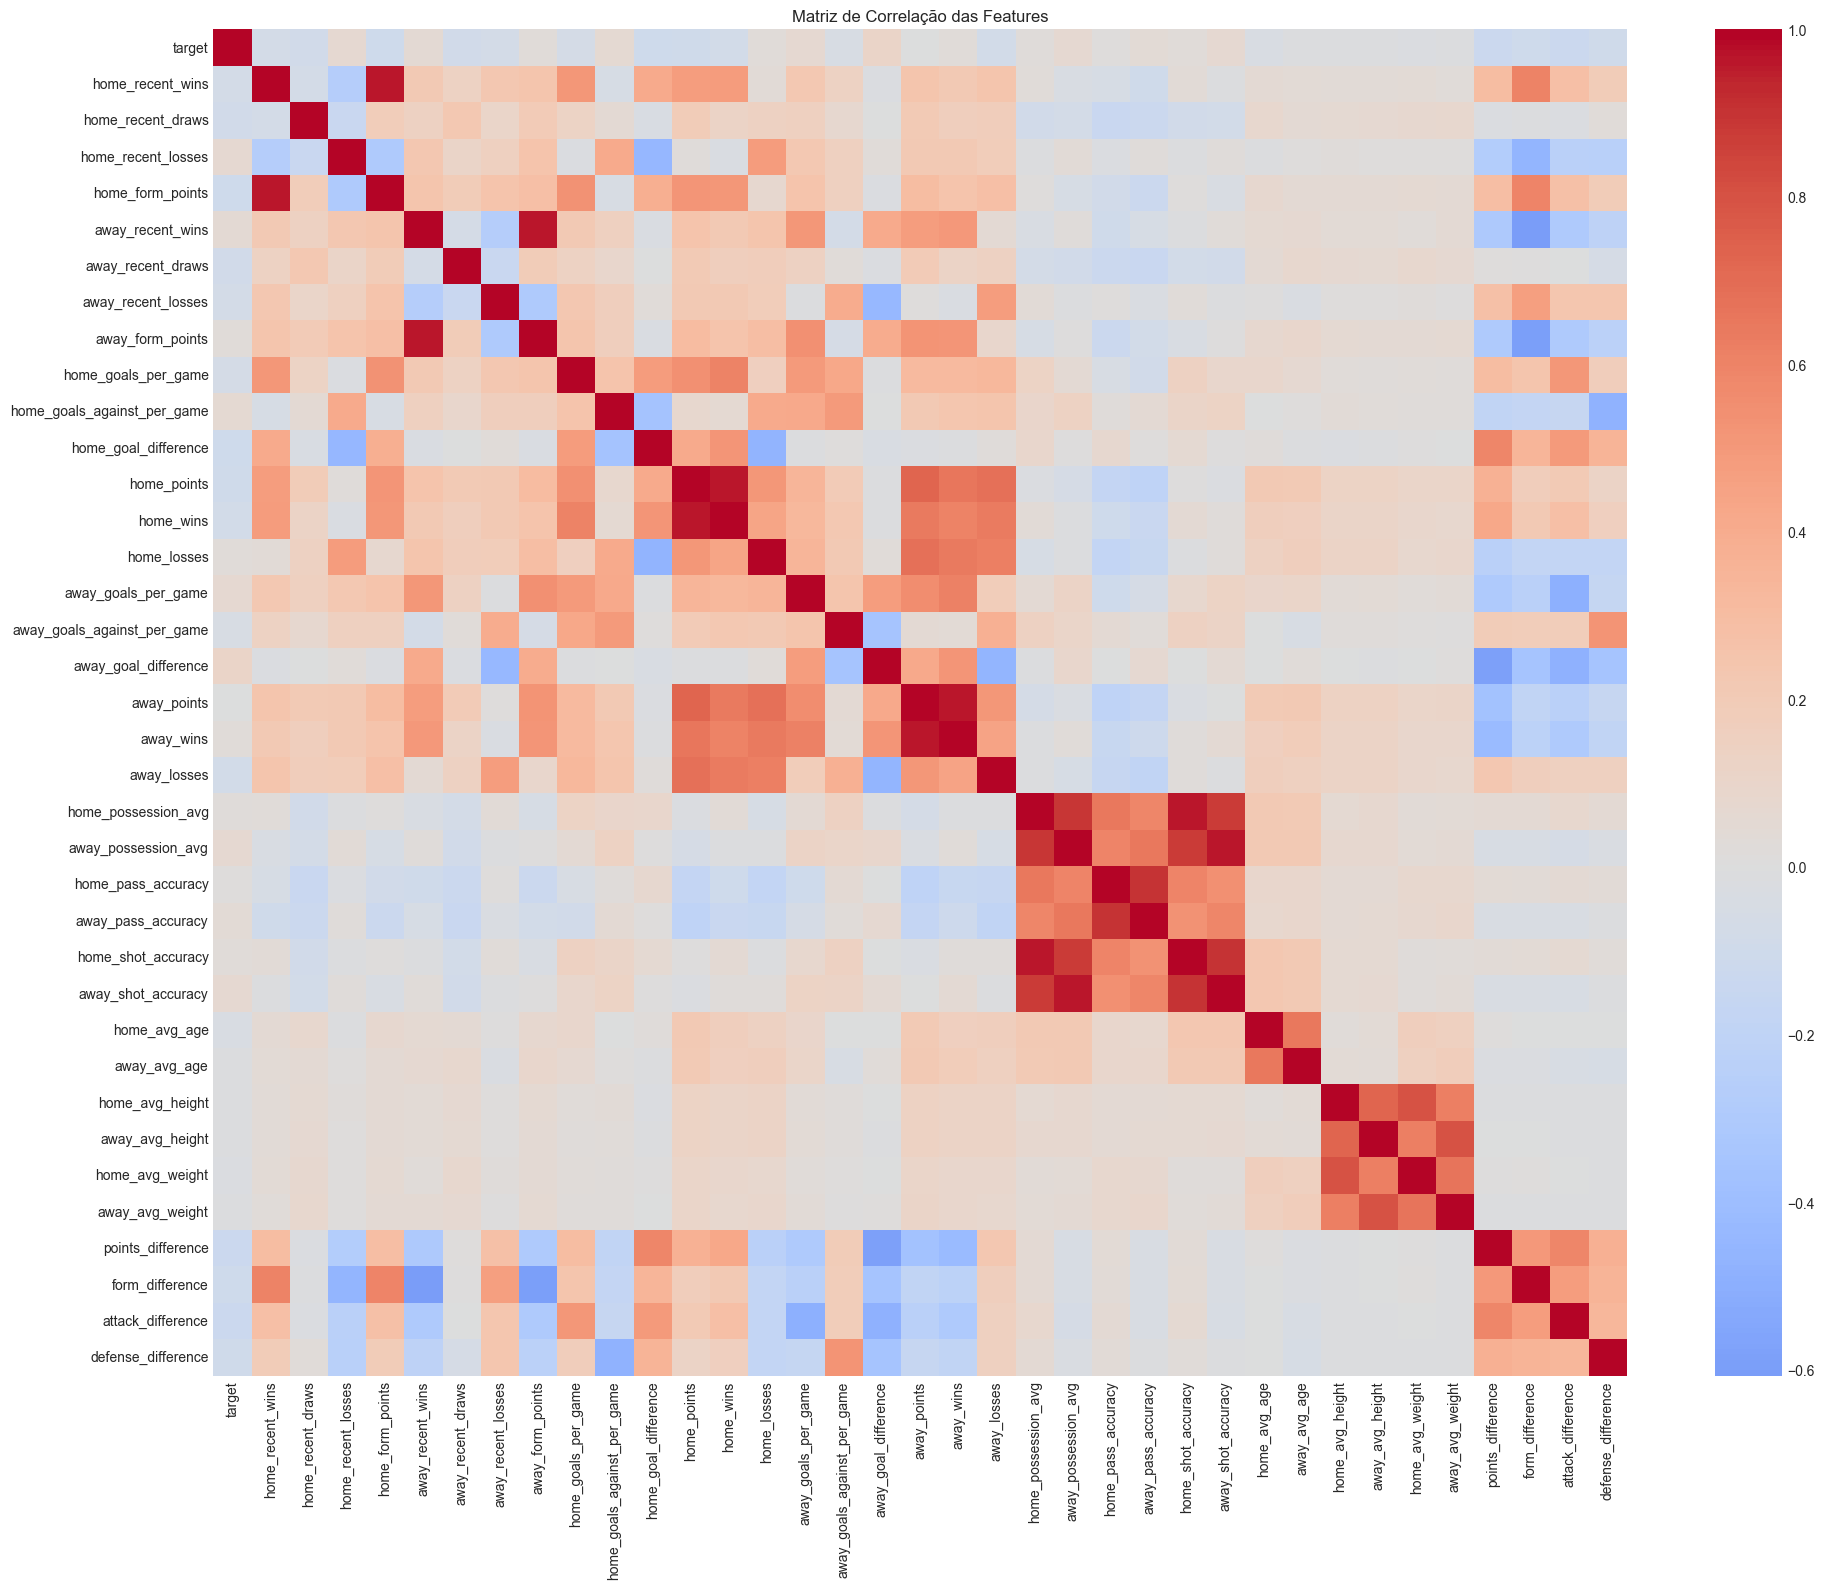


Top 10 features mais correlacionadas com o resultado:
away_goal_difference           0.112927
home_recent_losses             0.070715
away_possession_avg            0.066549
away_shot_accuracy             0.066196
away_goals_per_game            0.066143
home_goals_against_per_game    0.059962
away_recent_wins               0.051362
away_pass_accuracy             0.043413
away_wins                      0.032181
home_shot_accuracy             0.029132
Name: target, dtype: float64


In [ ]:
print("\n" + "="*60)
print("ANÁLISE DE CORRELAÇÃO")
print("="*60)

# Selecionar features numéricas
numeric_features = master_df.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features 
                   if col not in ['eventId', 'homeTeamId', 'awayTeamId']]

# Matriz de correlação
correlation_matrix = master_df[numeric_features].corr()

# Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Features')
plt.tight_layout()
plt.show()

# Top correlações com target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\nTop 10 features mais correlacionadas com o resultado:")
print(target_corr.head(11)[1:])  # Excluir o próprio target



ANÁLISE DE CORRELAÇÃO


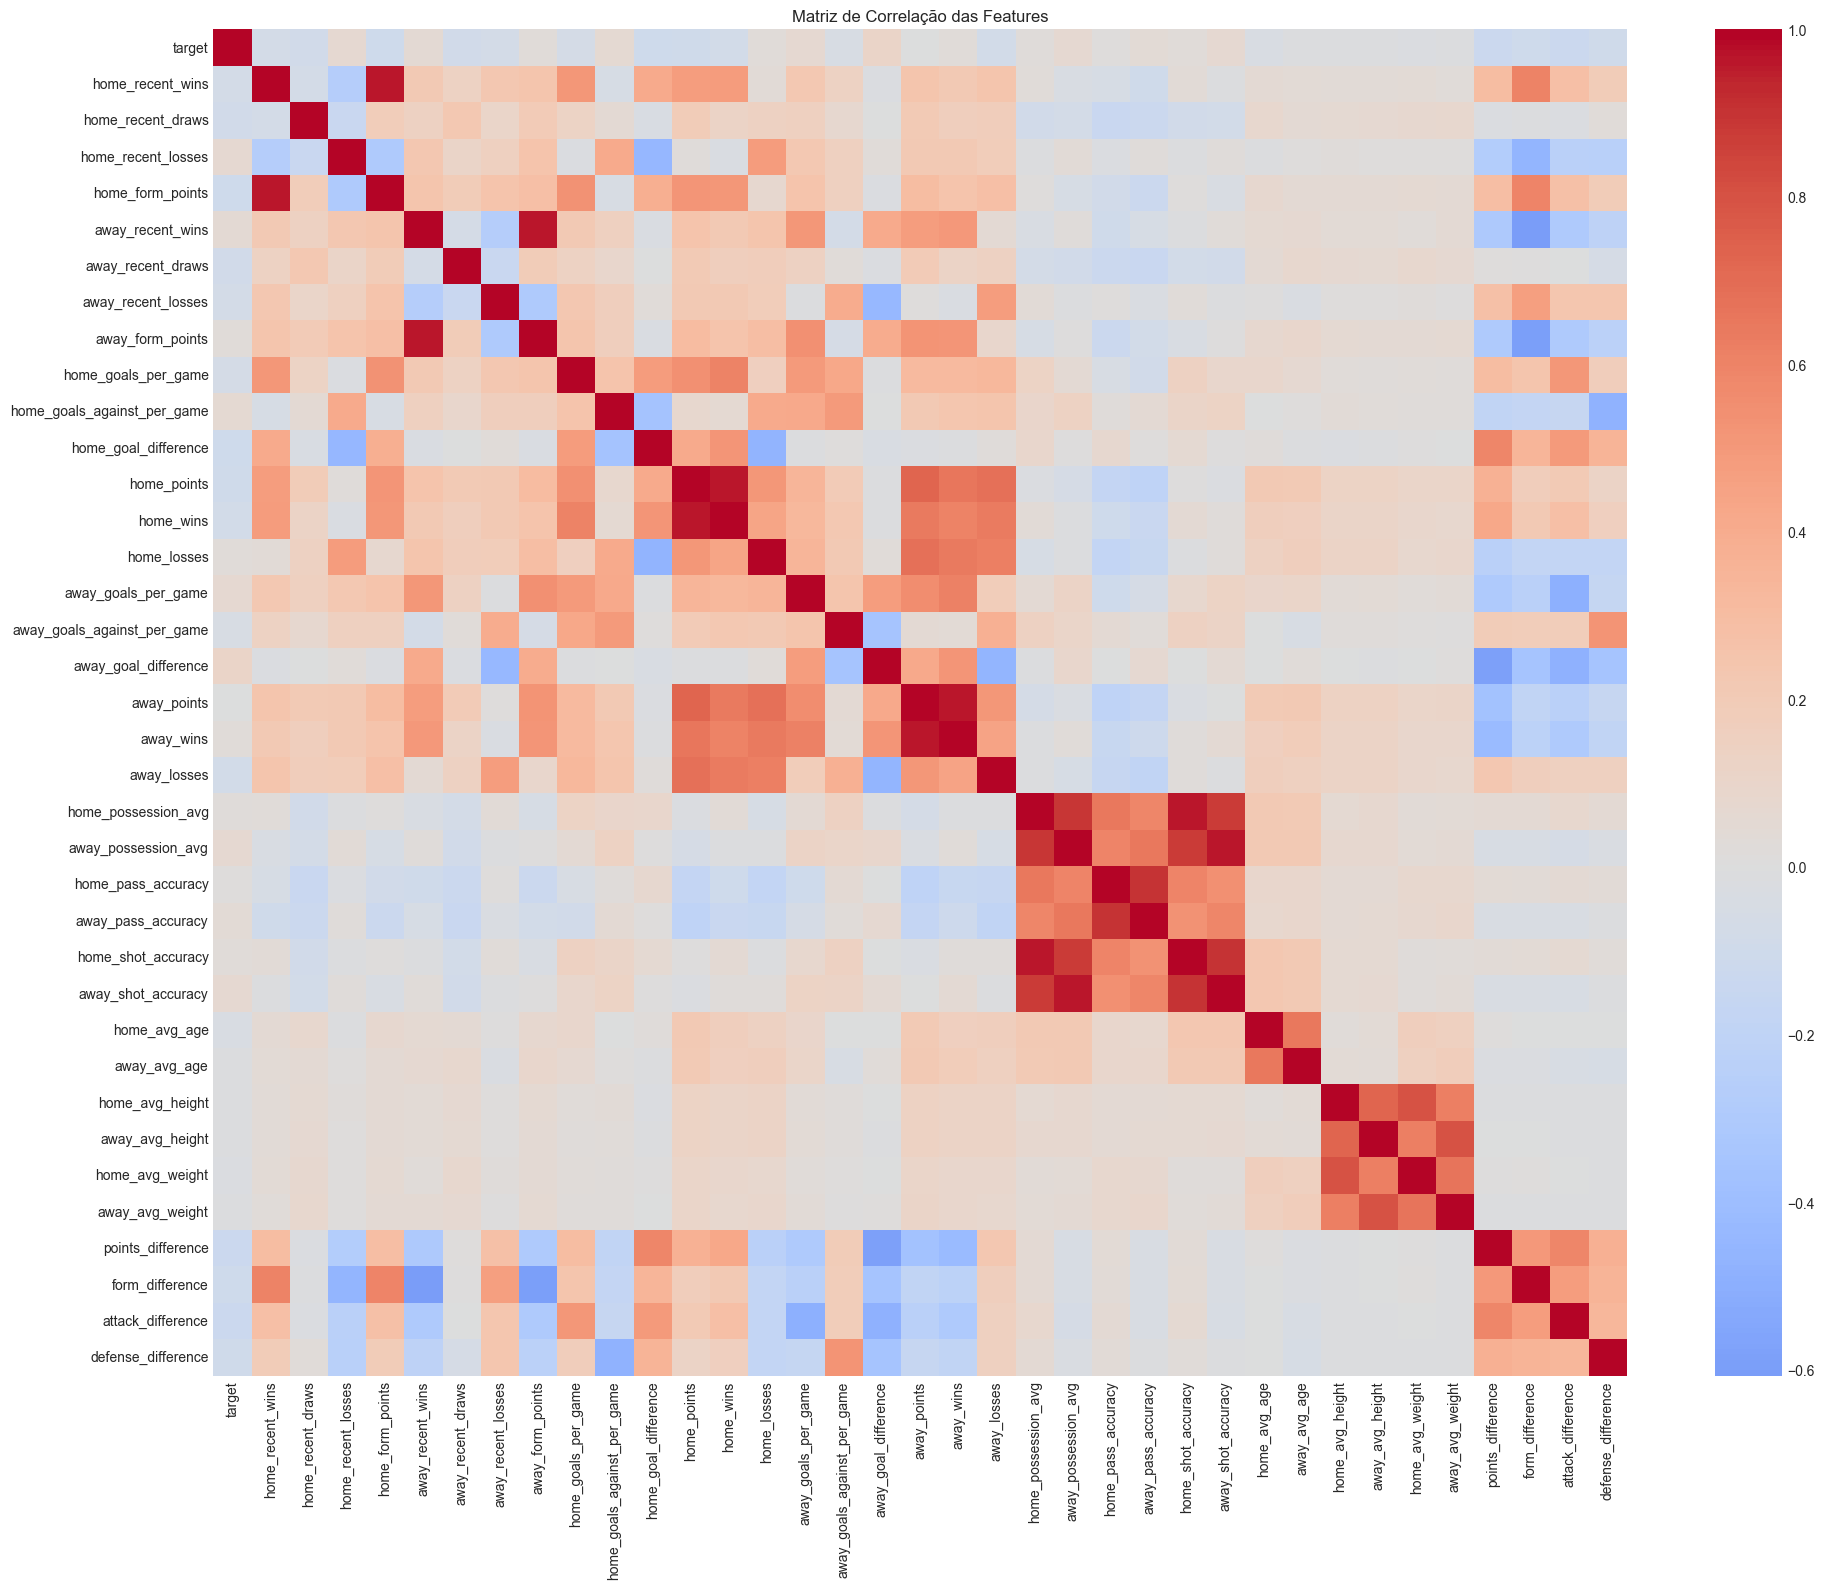


Top 10 features mais correlacionadas com o resultado:
away_goal_difference           0.112927
home_recent_losses             0.070715
away_possession_avg            0.066549
away_shot_accuracy             0.066196
away_goals_per_game            0.066143
home_goals_against_per_game    0.059962
away_recent_wins               0.051362
away_pass_accuracy             0.043413
away_wins                      0.032181
home_shot_accuracy             0.029132
Name: target, dtype: float64


In [ ]:
print("\n" + "="*60)
print("ANÁLISE DE CORRELAÇÃO")
print("="*60)

# Selecionar features numéricas
numeric_features = master_df.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features 
                   if col not in ['eventId', 'homeTeamId', 'awayTeamId']]

# Matriz de correlação
correlation_matrix = master_df[numeric_features].corr()

# Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Features')
plt.tight_layout()
plt.show()

# Top correlações com target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\nTop 10 features mais correlacionadas com o resultado:")
print(target_corr.head(11)[1:])  # Excluir o próprio target



DISTRIBUIÇÃO POR RESULTADO


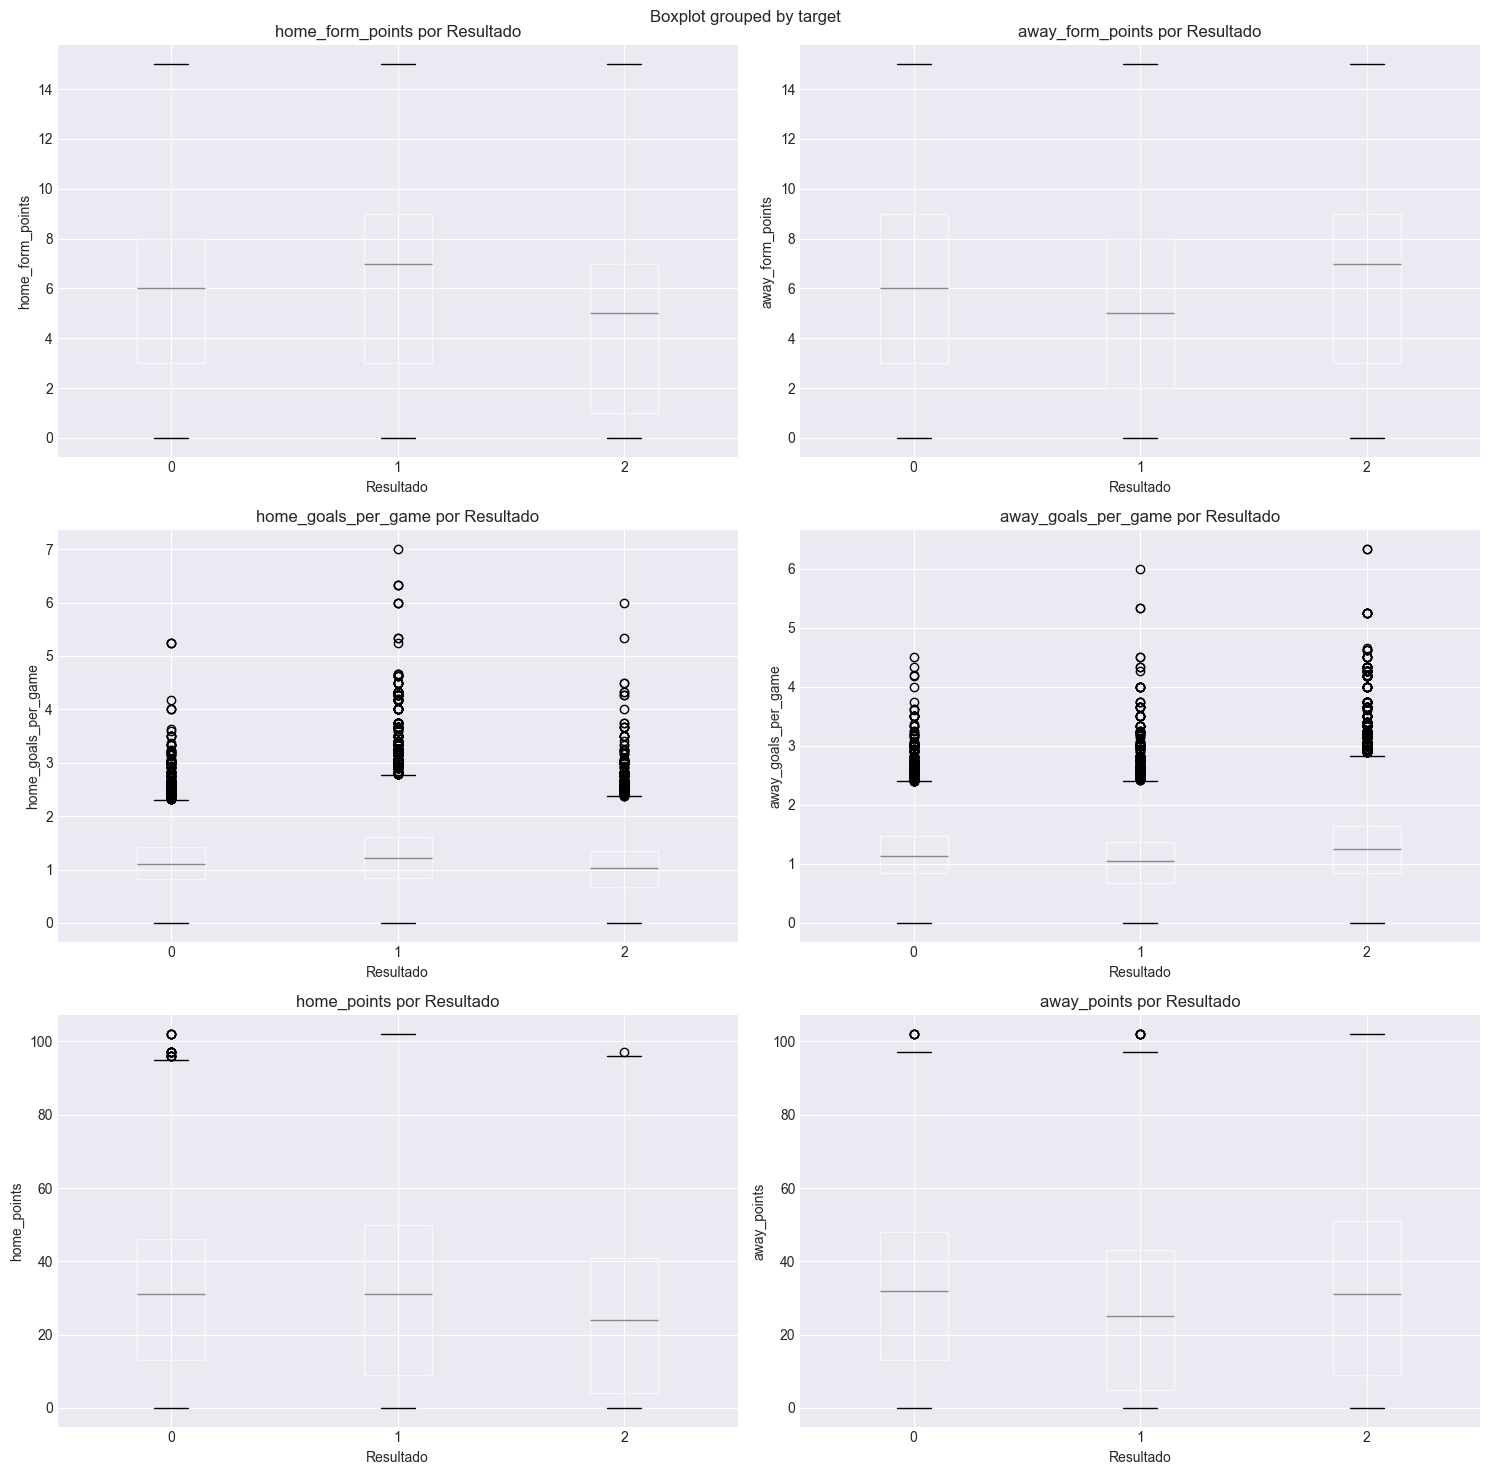

In [ ]:
print("\n" + "="*60)
print("DISTRIBUIÇÃO POR RESULTADO")
print("="*60)

# Selecionar algumas features importantes
important_features = [
    'home_form_points', 'away_form_points',
    'home_goals_per_game', 'away_goals_per_game',
    'home_points', 'away_points'
]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, feature in enumerate(important_features):
    if feature in master_df.columns:
        master_df.boxplot(column=feature, by='target', ax=axes[idx])
        axes[idx].set_title(f'{feature} por Resultado')
        axes[idx].set_xlabel('Resultado')
        axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*70)
print(" "*25 + "RESUMO DA ANÁLISE")
print("="*70)

print(f"\n📊 Dataset:")
print(f"  • Total de partidas: {len(master_df):,}")
print(f"  • Features criadas: {len([c for c in master_df.columns if c not in ['eventId', 'date', 'homeTeamId', 'awayTeamId', 'target']])}")
print(f"  • Período: {master_df['date'].min()} a {master_df['date'].max()}")

print(f"\n🎯 Distribuição de Resultados:")
result_dist = master_df['target'].value_counts(normalize=True) * 100
print(f"  • Empate: {result_dist[0]:.1f}%")
print(f"  • Vitória Casa: {result_dist[1]:.1f}%")
print(f"  • Vitória Visitante: {result_dist[2]:.1f}%")

print(f"\n✅ Dados prontos para modelagem!")
print("="*70)


                         RESUMO DA ANÁLISE

📊 Dataset:
  • Total de partidas: 55,838
  • Features criadas: 36
  • Período: 2024-01-01 05:00:00 a 2025-12-02 01:00:00

🎯 Distribuição de Resultados:
  • Empate: 24.3%
  • Vitória Casa: 45.7%
  • Vitória Visitante: 30.1%

✅ Dados prontos para modelagem!
